# Alura - 7 Days of Code - Dados - Machine Learning

![7DayOfCode-Logo](../imgs/7DaysOfCode-Logo.jpg)

Autor: Leonardo Simões

---
## Sumário
- [1.Introdução](#introduction)
- [2.Objetivo](#objectives)
- [3.Desenvolvimento](#development)
    - [3.1.Dia 1](#day_1)
    - [3.2.Dia 2](#day_2)
    - [3.3.Dia 3](#day_3)
- [4.Conclusão](#conclusion)
- [Referências](#references)

---
<a id='introduction'></a>
## 1. Introdução

Durante os 7 Days of Code de Machine Learning, você vai treinar suas habilidades de manipulação, visualização e análise de dados utilizando Machine Learning. 


---
<a id='objectives'></a>
## 2. Objetivo

O objetivo será analisar dados do Spotify, e aplicar técnicas de Machine Learning para prever a popularidade das músicas e, para isso, você passará por diversas etapas de um projeto de Machine Learning, desde a coleta de dados e análise exploratória até a validação dos modelos.

---
<a id='development'></a>
## 3. Desenvolvimento

---
<a id='day_1'></a>
### 3.1. Dia 1

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# Imports das bibliotecas mais usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Alterar a exibição de float para duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Versões das bibliotecas mais usadas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)

Numpy versão 1.23.5
Pandas versão 1.5.3


In [5]:
# Bibliotecas para criar o profile dos dados
import pydantic
from ydata_profiling import ProfileReport

In [6]:
# A versão deve ser < 2
print('Pydantic versão ' + pydantic.__version__)

Pydantic versão 1.10.12


In [7]:
# Biblioteca para divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold

In [8]:
# Biblioteca para construção do modelo de linha de base
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
print(skl.__version__)

1.2.2


In [10]:
generos_dict = {
    'acoustic' : 'acústico',
    'alternative' : 'alternativa',
    'ambient' :  'ambiente',
    'brazil' : 'brasileira',
    'british' : 'britânico',
    'children' : 'infantil',
    'classical' : 'classica',
    'comedy' : 'comedia',
    'dancehall' : 'dança de salão',
    'drum-and-bass' : 'bateria e baixo',
    'electro' : 'eletrônica',
    'electronic': 'eletrônica',
    'garage' : 'garagem',
    'german': 'alemã',
    'indian' : 'indiana',
    'iranian' : 'iraniana',
    'kids' : 'infantil',
    'latin' : 'latina',
    'sad': 'triste',
    'sleep': 'dormir',
    'spanish' : 'espanhola',
    'study' : 'estudo',
    'swedish' : 'sueca',
    'turkish': 'turca'
}

In [11]:
colunas = ['id_musica', 'artistas', 'nome_do_album', 'nome_da_faixa', 'popularidade', 'duracao_ms', 'explicito',  'dancabilidade', 'energia', 'chave', 'volume', 'modo', 'fala', 'acustica', 'instrumentalidade', 'vivacidade',  'valencia', 'tempo', 'assinatura_hora', 'gênero']

In [12]:
def carregar_dados(arquivo, colunas, generos_dict):
    df = pd.read_csv(arquivo, index_col=0)
    
    df.columns = colunas
    assert df.columns.tolist() == colunas
    
    df['gênero'].replace(generos_dict, inplace=True)
    assert set(generos_dict.values()).issubset(set(df['gênero'].unique()))
    
    df.dropna(inplace=True)
    assert df.isna().sum().sum() == 0
    
    df.drop_duplicates(inplace=True)
    assert df.duplicated().sum() == 0

    return df

In [13]:
df = carregar_dados('dataset.csv', colunas, generos_dict)
df.head()

,id_musica,artistas,nome_do_album,nome_da_faixa,popularidade,duracao_ms,explicito,dancabilidade,energia,chave,volume,modo,fala,acustica,instrumentalidade,vivacidade,valencia,tempo,assinatura_hora,gênero
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.68,0.46,1,-6.75,0,0.14,0.03,0.00,0.36,0.71,87.92,4,acústico
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.17,1,-17.23,1,0.08,0.92,0.00,0.10,0.27,77.49,4,acústico
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.44,0.36,0,-9.73,1,0.06,0.21,0.00,0.12,0.12,76.33,4,acústico
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.27,0.06,0,-18.52,1,0.04,0.91,0.00,0.13,0.14,181.74,3,acústico
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.62,0.44,2,-9.68,1,0.05,0.47,0.00,0.08,0.17,119.95,4,acústico


In [14]:
#profile = ProfileReport(df)
#profile

In [15]:
#profile.to_file('Spotify-Profile-1.html')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113468 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_musica          113468 non-null  object 
 1   artistas           113468 non-null  object 
 2   nome_do_album      113468 non-null  object 
 3   nome_da_faixa      113468 non-null  object 
 4   popularidade       113468 non-null  int64  
 5   duracao_ms         113468 non-null  int64  
 6   explicito          113468 non-null  bool   
 7   dancabilidade      113468 non-null  float64
 8   energia            113468 non-null  float64
 9   chave              113468 non-null  int64  
 10  volume             113468 non-null  float64
 11  modo               113468 non-null  int64  
 12  fala               113468 non-null  float64
 13  acustica           113468 non-null  float64
 14  instrumentalidade  113468 non-null  float64
 15  vivacidade         113468 non-null  float64
 16  va

### Quais são as 100 músicas mais populares?

In [17]:
# 100 Músicas mais populares
colunas_p1 = ['id_musica', 'nome_da_faixa', 'popularidade']
grupo_p1 = ['id_musica', 'nome_da_faixa']
df_p1 = df.groupby(grupo_p1, as_index=False)['popularidade'].max()
df_p1.sort_values(by=['popularidade'], ascending=False).head(100)

,id_musica,nome_da_faixa,popularidade
43850,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),100
33330,2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",99
56457,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),98
68459,5ww2BF9slyYgNOk37BlC4u,La Bachata,98
14969,1IHWl5LamUGEuP4ozKQSXZ,Tití Me Preguntó,97
...,...,...,...
81394,73vIOb4Q7YN6HeJTbscRx5,Miss You,87
10261,0tgVpDi06FyKpA1z0VMD4v,Perfect,87
26514,2JPLbjOn0wPCngEot2STUS,Yonaguni,87
43256,3kUq4sBcmxhnOtNysZ9yrp,Feliz Cumpleaños Ferxxo,87


### Quais os artistas mais populares?

In [18]:
# Artistas mais populares
grupo_p2 = ['artistas']
df_p2 = df.groupby(grupo_p2, as_index=False)['popularidade'].mean()
df_p2.sort_values(by=['popularidade'], ascending=False)

,artistas,popularidade
24119,Sam Smith;Kim Petras,100.00
3629,Bizarrap;Quevedo,99.00
17442,Manuel Turizo,98.00
2857,Bad Bunny;Chencho Corleone,97.00
2855,Bad Bunny;Bomba Estéreo,94.50
...,...,...
9166,Faith Hill;Tim McGraw,0.00
9164,Faith Evans;The Notorious B.I.G.,0.00
9163,Faith Evans,0.00
21430,Pher,0.00


### Quais são os gêneros musicais mais populares?

In [19]:
# Artistas mais populares
grupo_p3 = ['gênero']
df_p3 = df.groupby(grupo_p3, as_index=False)['popularidade'].mean()
df_p3.sort_values(by=['popularidade'], ascending=False)

,gênero,popularidade
82,pop-film,59.28
67,k-pop,56.96
16,chill,53.70
109,triste,52.38
45,grunge,49.58
...,...,...
15,chicago-house,12.33
25,detroit-techno,11.18
68,latina,8.36
94,romance,3.55


<a id='day_2'></a>
### 3.2. Dia 2

In [20]:
# Exibe os nomes das colunas
df.columns.to_list()

['id_musica',
 'artistas',
 'nome_do_album',
 'nome_da_faixa',
 'popularidade',
 'duracao_ms',
 'explicito',
 'dancabilidade',
 'energia',
 'chave',
 'volume',
 'modo',
 'fala',
 'acustica',
 'instrumentalidade',
 'vivacidade',
 'valencia',
 'tempo',
 'assinatura_hora',
 'gênero']

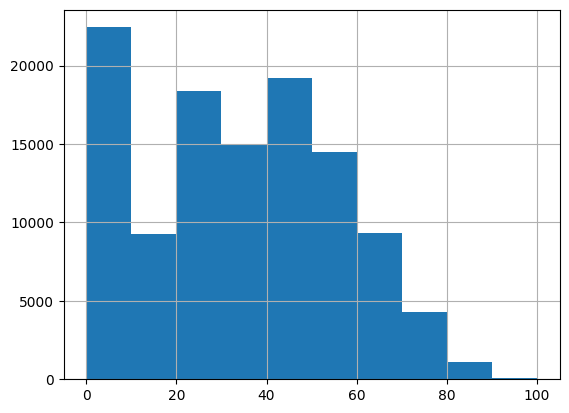

In [21]:
# Distribuição dos valores de popularidade
df['popularidade'].hist();

In [22]:
# Verificando a quantidade por corte de popularidade de 65
df[df['popularidade'] < 65].shape[0], df[df['popularidade'] > 65].shape[0]

(104019, 8498)

In [23]:
is_popular = df['popularidade'] > 60
df['eh_popular'] = 0
df.loc[is_popular, ['eh_popular']] = 1
df['eh_popular'].value_counts()

0    99938
1    13530
Name: eh_popular, dtype: int64

In [24]:
# Teste variáveis dummies de gênero
pd.get_dummies(df, columns=['gênero'], prefix=['genero'])

,id_musica,artistas,nome_do_album,nome_da_faixa,popularidade,duracao_ms,explicito,dancabilidade,energia,chave,...,genero_soul,genero_sueca,genero_synth-pop,genero_tango,genero_techno,genero_trance,genero_trip-hop,genero_triste,genero_turca,genero_world-music
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.68,0.46,1,...,0,0,0,0,0,0,0,0,0,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.17,1,...,0,0,0,0,0,0,0,0,0,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.44,0.36,0,...,0,0,0,0,0,0,0,0,0,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.27,0.06,0,...,0,0,0,0,0,0,0,0,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.62,0.44,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.17,0.23,5,...,0,0,0,0,0,0,0,0,0,1
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.17,0.12,0,...,0,0,0,0,0,0,0,0,0,1
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.63,0.33,0,...,0,0,0,0,0,0,0,0,0,1
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.59,0.51,7,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Dataframe numérico
dfn = df.select_dtypes(include=['float', 'int']).drop(columns=['popularidade', 'chave', 'fala', 'modo', 'energia', 'tempo'])
dfn.head()

,duracao_ms,dancabilidade,volume,acustica,instrumentalidade,vivacidade,valencia,assinatura_hora,eh_popular
0,230666,0.68,-6.75,0.03,0.00,0.36,0.71,4,1
1,149610,0.42,-17.23,0.92,0.00,0.10,0.27,4,0
2,210826,0.44,-9.73,0.21,0.00,0.12,0.12,4,0
3,201933,0.27,-18.52,0.91,0.00,0.13,0.14,3,1
4,198853,0.62,-9.68,0.47,0.00,0.08,0.17,4,1


In [26]:
# Normalização Min-Max
df_normalized = (dfn - dfn.min()) / (dfn.max() - dfn.min())
df_normalized.head()

,duracao_ms,dancabilidade,volume,acustica,instrumentalidade,vivacidade,valencia,assinatura_hora,eh_popular
0,0.04,0.69,0.79,0.03,0.00,0.36,0.72,0.80,1.00
1,0.03,0.43,0.60,0.93,0.00,0.10,0.27,0.80,0.00
2,0.04,0.44,0.74,0.21,0.00,0.12,0.12,0.80,0.00
3,0.04,0.27,0.57,0.91,0.00,0.13,0.14,0.60,1.00
4,0.04,0.63,0.74,0.47,0.00,0.08,0.17,0.80,1.00


In [27]:
# Correlação de pearson para 'eh_popular'
df_normalized.corr(method="pearson")['eh_popular']

duracao_ms          -0.03
dancabilidade        0.06
volume               0.06
acustica            -0.06
instrumentalidade   -0.11
vivacidade          -0.06
valencia             0.02
assinatura_hora      0.03
eh_popular           1.00
Name: eh_popular, dtype: float64

<a id='day_3'></a>
### 3.3. Dia 3

In [28]:
# Separando variável targer das variáveis features
X = df_normalized.drop(columns=['eh_popular'])
y = df_normalized['eh_popular']

In [29]:
# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [30]:
# Dimensões dos conjuntos de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90774, 8), (22694, 8), (90774,), (22694,))

In [31]:
# Valores de 'eh_popular'
y.value_counts(normalize=True)

0.00   0.88
1.00   0.12
Name: eh_popular, dtype: float64

In [32]:
# Valores de 'eh_popular' para o conjunto de treino 
y_train.value_counts(normalize=True)

0.00   0.88
1.00   0.12
Name: eh_popular, dtype: float64

In [33]:
# Valores de 'eh_popular' para o conjunto de teste
y_test.value_counts(normalize=True)

0.00   0.88
1.00   0.12
Name: eh_popular, dtype: float64

<a id='day_4'></a>
### 3.4. Dia 4

In [34]:
def treinar_modelo_base(X, y):
    modelo_base = LogisticRegression(random_state=0)
    modelo_base.fit(X, y)
    
    return modelo_base 

In [35]:
modelo_base = treinar_modelo_base(X_train, y_train)
modelo_base

LogisticRegression(random_state=0)

In [36]:
def score_modelo(modelo, X, y):
    return round(modelo_base.score(X, y), 3)

In [37]:
print('Score do modelo para os dados de treino: ' + str(score_modelo(modelo_base, X_train, y_train)) + '.')

Score do modelo para os dados de treino: 0.881.


In [38]:
print('Score do modelo para os dados de teste: ' + str(score_modelo(modelo_base, X_test, y_test)) + '.')

Score do modelo para os dados de teste: 0.881.


In [39]:
def coeficientes_regressao_logistica(modelo, X):
    coeficientes_values = np.append(modelo.coef_, modelo.intercept_)
    coeficientes_df = pd.DataFrame(coeficientes_values).T
    coeficientes_nomes = X.columns.to_list()
    coeficientes_nomes.append('constante')
    coeficientes_df.columns = coeficientes_nomes
    coeficientes_df.index = ['Coeficientes']
    
    return coeficientes_df.T

In [40]:
# Exibe os coeficientes do modelo 
coeficientes_regressao_logistica(modelo_base, X_train)

,Coeficientes
duracao_ms,-3.63
dancabilidade,0.93
volume,-0.02
acustica,-0.50
instrumentalidade,-1.57
vivacidade,-1.28
valencia,-0.61
assinatura_hora,0.53
constante,-1.93


In [41]:
def plot_confusion_matrix_lr(model, X, y, titulo_compl=''):
    # Classes do modelo
    classes = modelo_base.classes_
    
    # Calcula as previsões do modelo
    y_pred = model.predict(X)
    
    # Calcula a matriz de confusão
    cm = confusion_matrix(y, y_pred)
    
    # Cria um objeto ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    
    # Plota a matriz de confusão
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    
    # Ajusta o estilo do gráfico
    plt.xlabel('Previsões')
    plt.ylabel('Rótulos Verdadeiros')
    plt.title('Matriz de Confusão' + titulo_compl)
    
    # Exibe o gráfico
    plt.show()

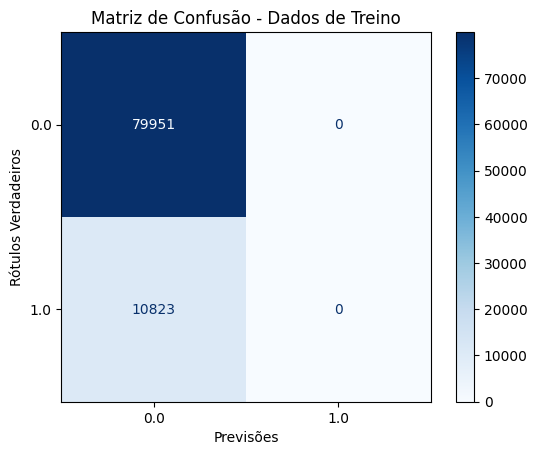

In [42]:
plot_confusion_matrix_lr(modelo_base, X_train, y_train, titulo_compl=' - Dados de Treino')

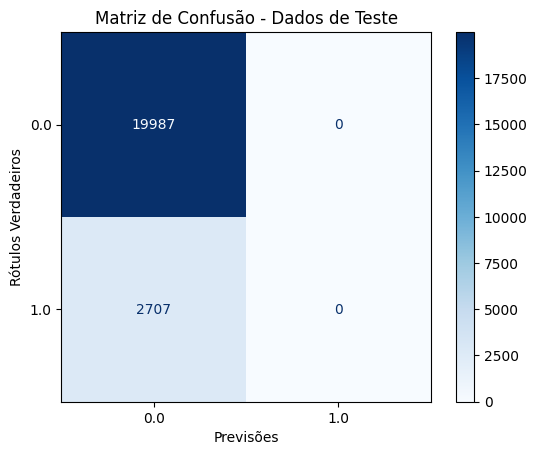

In [43]:
plot_confusion_matrix_lr(modelo_base, X_test, y_test, titulo_compl=' - Dados de Teste')

---
<a id='conclusion'></a>
## 4. Conclusão

---
<a id='references'></a>
## Referências

Alura - 7 Days of Code - Dados - Machine Learning: https://7daysofcode.io/matricula/machine-learning , acessado em 20/09/2023.

Kaggle - Spotify Tracks Dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-datase , acessado em 21/09/2023.

Linkedin - Traduzindo dados no Pandas.DataFrame() com Google Translate: https://www.linkedin.com/pulse/traduzindo-dados-pandasdataframe-com-google-translate-romerito-morais/ , acessado em 21/09/2023.

HastagTreinamentos - Pandas Profiling no Python – Análise de dados rápida: https://www.hashtagtreinamentos.com/pandas-profiling-no-python-ciencia-dados , acessado em 21/09/2023.

---
<div style="text-align: center"> Copyright &copy; 2023 | Leonardo Simões | All Rights Reserved </div>

---